**🧠 Assignment 1: Many-to-One Sequence Model**
**Goal (What you must understand after this)**

You should clearly understand:

- What Many-to-One means

- How sequential data is structured

- How an RNN / LSTM / GRU turns a sequence into one prediction

- How to prepare data, train, evaluate, and explain the result

**📌 Problem Definition**
**Project Title**

```Movie Review Sentiment Classification (Many-to-One)```

Task

| Given a sequence of words (a sentence / review), predict one label:

```Positive``` or ```Negative```

👉 This is Many inputs → One output

# 🔹 Task 1: Understand the Data

**Deliverable**

**Print:**

- Vocabulary size

- Max sequence length

- Example review (decoded)

**You must answer**

- Why are reviews converted to numbers?

- Why do we pad sequences?

In [1]:
import pandas as pd
import numpy as np
import torch 
from collections import  Counter
import re

data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# Check the basic info:
def preprocessor_text(text):
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Keep only letters and spaces (remove punctuation, numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Changed \S to \s (whitespace)
    # return as a word list
    return text.split()

In [4]:
data['review'].dtypes

dtype('O')

In [5]:
# Get all reviews and preprocess
reviews = data['review'].values # Convert to numpy value
sentiments = data['sentiment'].values

In [6]:
print(reviews)

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [7]:
# Tokenize all reviews
tokenized_reviews = [preprocessor_text(review) for review in reviews]

In [8]:
# Build vocabulary 
vocab_size = 10000 # limit to top 10k words

all_words=[]
for review in tokenized_reviews:
    for word in review:
        all_words.append(word)

word_counts = Counter(all_words)
most_common = word_counts.most_common(vocab_size - 2) # -2 for PAD and UNK

In [9]:
# Create word to index mapping
word2idx = {'<PAD>':0, '<UNK>':1}
word2idx.update({word: idx + 2 for idx, (word, _) in enumerate(most_common)})
idx2word = {idx: word for word, idx in word2idx.items()}


In [10]:
# DELEVERABLE 1: Vocabulary size
actual_vocab_size = len(word2idx)
print(f"\nVocabulary Size: {actual_vocab_size}")
print(f"Using top {vocab_size} most common words")
print(f"Specail tokens: <PAD>=0, <UNK>=1")


Vocabulary Size: 10000
Using top 10000 most common words
Specail tokens: <PAD>=0, <UNK>=1


**Step 3: Convert to Sequences and Find Max Length**

In [11]:
# Convert words to indices
def encode_review(tokens, word2idx):
    return [word2idx.get(word, word2idx['<UNK>']) for word in tokens]

# Encode all reviews
encode_reviews = [encode_review(review, word2idx) for review in tokenized_reviews]

In [12]:
# DELIVERABLE 2: Max Sequence Length
sequence_lengths = [len(seq) for seq in encode_reviews]
max_length = max(sequence_lengths)
avg_length = np.mean(sequence_lengths)

In [13]:
print(f"\nMax Sequence Length: {max_length} words")
print(f"Average Length: {avg_length:.2f} words")
print(f"Min Length: {min(sequence_lengths)} words")
print(f"Median Length: {np.median(sequence_lengths):.0f} words")


Max Sequence Length: 2441 words
Average Length: 225.19 words
Min Length: 4 words
Median Length: 169 words


**Step 4: Padding Function (PyTorch)**

In [14]:
# Padding function

def pad_sequences(sequences, max_len, pad_value=0):
    padded = []
    for seq in sequences:
        if len(seq) >= max_len:
            padded.append(seq[:max_len])
        else:
            padded.append(seq + [pad_value] * (max_len - len(seq)))
    return padded
max_len = 500

# Apply all sequences
padded_reviews = pad_sequences(encode_reviews, max_len, pad_value=word2idx['<PAD>'])
print(f"Padded all sequences to length: {max_len}")
print(f"Shape: ({len(padded_reviews)}, {max_len})")

Padded all sequences to length: 500
Shape: (50000, 500)


In [15]:
# ✅ DELIVERABLE 3: Example Review (Decoded)
example_idx = 0

original_review = reviews[example_idx]
tokenized = tokenized_reviews[example_idx]
encoded = encode_reviews[example_idx]
padded = padded_reviews[example_idx]

# Decode function
def decode_review(encoded_seq, idx2word):
    return ' '.join([idx2word.get(idx, '<UNK>') for idx in encoded_seq if idx != 0])

decoded = decode_review(encoded, idx2word)

print(f"\n📝 Example Review #{example_idx}:")
print(f"   Sentiment: {sentiments[example_idx]}")
print(f"\n   Original Review (first 300 chars):")
print(f"   {original_review[:300]}...")
print(f"\n   Tokenized (first 20 words): {tokenized[:20]}")
print(f"\n   Encoded (first 20 numbers): {encoded[:20]}")
print(f"\n   Padded (first 20): {padded[:20]}")
print(f"   Padded (last 20): {padded[-20:]}")
print(f"\n   Decoded Review (first 300 chars):")
print(f"   {decoded[:300]}...")


📝 Example Review #0:
   Sentiment: positive

   Original Review (first 300 chars):
   One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru...

   Tokenized (first 20 words): ['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'as']

   Encoded (first 20 numbers): [28, 5, 2, 78, 1914, 43, 1051, 12, 101, 145, 40, 3272, 391, 457, 26, 3115, 34, 23, 206, 14]

   Padded (first 20): [28, 5, 2, 78, 1914, 43, 1051, 12, 101, 145, 40, 3272, 391, 457, 26, 3115, 34, 23, 206, 14]
   Padded (last 20): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

   Decoded Review (first 300 chars):
   one of the other reviewers has mentioned th

**Step 6: Convert to Pytorch tensors**

In [16]:
X= torch.tensor(padded_reviews, dtype=torch.long)

# Convert sentiments to binary (positive = 1 and negative =0)
y = torch.tensor([1 if s == 'positive' else 0 for s in sentiments], dtype=torch.long)

print(f"\n🔥 PyTorch Tensors Created:")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")
print(f"   X dtype: {X.dtype}")
print(f"   y dtype: {y.dtype}")
print(f"\n   Sample X[0][:10]: {X[0][:10]}")
print(f"   Sample y[0]: {y[0]}")


🔥 PyTorch Tensors Created:
   X shape: torch.Size([50000, 500])
   y shape: torch.Size([50000])
   X dtype: torch.int64
   y dtype: torch.int64

   Sample X[0][:10]: tensor([  28,    5,    2,   78, 1914,   43, 1051,   12,  101,  145])
   Sample y[0]: 1


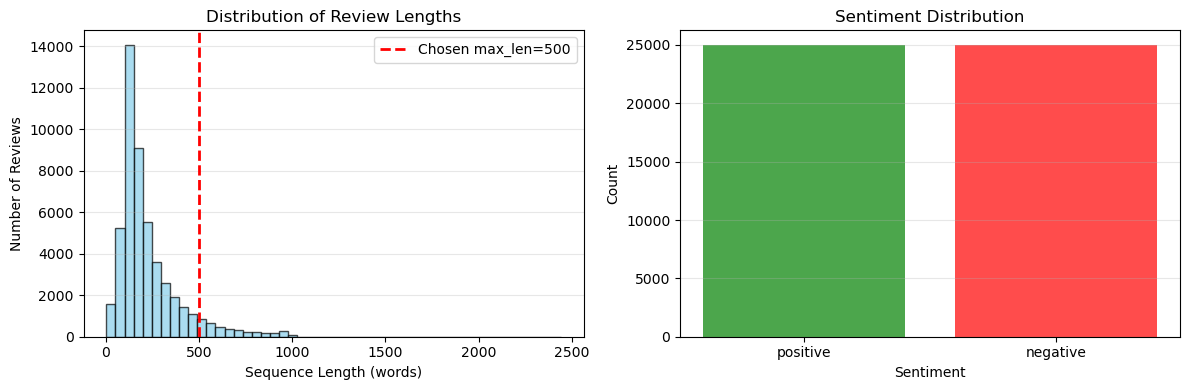


💡 Insight: 92.7% of reviews fit within 500 words


In [17]:
import matplotlib.pyplot as plt

# Visualize sequence length distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(sequence_lengths, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(max_len, color='red', linestyle='--', linewidth=2, label=f'Chosen max_len={max_len}')
plt.xlabel('Sequence Length (words)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'], alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

coverage = sum(1 for l in sequence_lengths if l <= max_len) / len(sequence_lengths) * 100
print(f"\n💡 Insight: {coverage:.1f}% of reviews fit within {max_len} words")

## 🤔 Answers to Questions

### ❓ Why are reviews converted to numbers?

**Answer:**
- **Neural networks only understand numbers**, not text
- Each word gets a unique integer ID (word → number mapping)
- Creates a mathematical representation that models can learn from
- Enables embedding layers to learn vector representations of words
- Words with similar meanings will have similar learned embeddings
- **Example**: 
  - "amazing" → 245
  - "excellent" → 187
  - "terrible" → 89

### ❓ Why do we pad sequences?

**Answer:**
- **PyTorch requires fixed-length inputs** for efficient batch processing
- Reviews have varying lengths (10 words vs 500 words)
- Padding adds `<PAD>` tokens (zeros) to make all sequences equal length
- **Post-padding** (zeros at end) preserves the actual content at the start
- Enables parallel processing of multiple reviews in batches
- **Example**:
  ```
  Review A: [45, 23, 67]          → [45, 23, 67, 0, 0, 0, 0]
  Review B: [12, 89, 34, 56, 78]  → [12, 89, 34, 56, 78, 0, 0]
  ```
- The model learns to ignore padding tokens during training

**Task 3: Build the Many-to-One LSTM Model**

In [18]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [19]:
# Check if GPU is avialable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cuda


In [24]:
# Define the many-to-many lstm mode

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional=False, dropout=0.3):
        """
        - vocab_size: How many unique words does the model know? (Must match your word2idx)
        - embedding_dim: How 'rich' is the meaning of each word? (size of the vector representing a word) TV: 100 or 300
        - hidden_dim: How much can the LSTM 'remember' at one time? (the size of its short-term memory) TV: 256 or 512
        - output_dim: How many outputs? (for sentiment 1 = probability of positive) TV: 1
        - n_layers: How deep is the network? (stacking LSTMs on top of each other)
        - bidirectional: Should it read the text forwards and backwards? (True is usually better) TV: True
        - dropout: How much should it randomly 'forget' during training to prevent over-memorizing? 0.3 to 0.5

        """
        
        super(SentimentLSTM,self).__init__()
        # Embeddig layer: converts word indices to dense vector
        # Example: [12, 45, 7] → [[0.1, 0.5, ...], [0.2, ...], [0.9, ...]]
        self.embedding = nn.Embedding(vocab_size,embedding_dim,padding_idx=0)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,                # size of each word vector
            hidden_size=hidden_dim,                  # memory size of LSTM
            num_layers=n_layers,                     # stacked LSTM
            bidirectional=bidirectional,             # read text forward and backward
            dropout=dropout if n_layers > 1 else 0,  # Input shape (batch, seq, features)
            batch_first=True
        )

        # fully connected layer
        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.fc = nn.Linear(lstm_output_dim, output_dim)
        """
        Why hidden_dim * 2?
        Bidirectional LSTM = forward + backward
        So hidden size doubles
        """

        self.dropout = nn.Dropout(dropout)
    
    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        hidden = self.dropout(hidden)
        prediction = self.fc(hidden)
        return prediction
    
# Model hyperparameter
vocab_size = actual_vocab_size 
embedding_dim = 100
hidden_dim = 256
output_dim = 1
n_layer = 2
bidirectional = True
dropout = 0.3

# Initialize model
model = SentimentLSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    n_layers=n_layer,
    bidirectional=bidirectional,
    dropout=dropout
).to(device)

print(f'Model architecture')
print(model)



Model architecture
SentimentLSTM(
  (embedding): Embedding(10000, 100, padding_idx=0)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


**Training**

In [25]:
from sklearn.model_selection import train_test_split

# Create train/validation split (80/20)
train_size = int(0.8 * len(X))
val_size = len(X) - train_size

train_dataset = TensorDataset

train_dataset = TensorDataset(X[:train_size], y[:train_size])
val_dataset = TensorDataset(X[train_size:], y[train_size:])

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"   Training samples: {len(train_dataset)}")
print(f"   Validation samples: {len(val_dataset)}")
print(f"   Batch size: {batch_size}")
print(f"   Training batches: {len(train_loader)}")
print(f"   Validation batches: {len(val_loader)}")


   Training samples: 40000
   Validation samples: 10000
   Batch size: 64
   Training batches: 625
   Validation batches: 157


In [26]:
criterion = nn.BCEWithLogitsLoss()

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"\n🔧 Training Setup:")
print(f"   Loss Function: BCEWithLogitsLoss")
print(f"   Optimizer: Adam")
print(f"   Learning Rate: {learning_rate}")


🔧 Training Setup:
   Loss Function: BCEWithLogitsLoss
   Optimizer: Adam
   Learning Rate: 0.001


In [ ]:
# Training function
def train_epoch(model, iterator, optimizer, criterion,device):
    model.train()
    epoch_loss= 0
    correct = 0
    total = 0

    for batch_idx, (text, labels) in enumerate(iterator):
        text = text.to(device)
        labels = labels.to(device).unsqueeze(1).float()

        # Forward pass
        predictions = model(text)
        loss = criterion(predictions, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        epoch_loss += loss.item()

        # Count correct prediction
        pred_binary = (predictions>0.5).float()
        correct += (pred_binary == labels).sum().item()
        total += labels.size(0)

        # print progress
        if(batch_idx+1) % 50 == 0:
            print(f"Bactch {batch_idx+1}/{len(iterator)}, Loss: {loss.item():.4f}")
    
    return epoch_loss/len(iterator), correct/total

# Validation function
def evaluate(model, iterator, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for text, labels in iterator:
            text = text.to(device)
            labels = labels.to(device).unsqueeze(1).float()
            
            predictions = model(text)
            loss = criterion(predictions, labels)
            
            epoch_loss += loss.item()
            
            pred_binary = (predictions > 0.5).float()
            correct += (pred_binary == labels).sum().item()
            total += labels.size(0)
    
    return epoch_loss / len(iterator), correct / total

train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Training for 50 epochs
n_epochs = 10

for epoch in range(n_epochs):
    print(f"Epoch {epoch + 1}/{n_epochs}")
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validate
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"   Training   Loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")
    print(f"   Validation Loss: {val_loss:.4f} | Accuracy: {val_acc:.4f}")
    print()

Epoch 1/10
Bactch 50/625, Loss: 0.6515
Bactch 100/625, Loss: 0.6539
Bactch 150/625, Loss: 0.6935
Bactch 200/625, Loss: 0.6596
Bactch 250/625, Loss: 0.6493
Bactch 300/625, Loss: 0.7962
Bactch 350/625, Loss: 0.7192
Bactch 400/625, Loss: 0.6885
Bactch 450/625, Loss: 0.6299
Bactch 500/625, Loss: 0.7230
Bactch 550/625, Loss: 0.6790
Bactch 600/625, Loss: 0.5880
   Training   Loss: 0.6567 | Accuracy: 0.5780
   Validation Loss: 0.5769 | Accuracy: 0.6957

Epoch 2/10
Bactch 50/625, Loss: 0.5979
Bactch 100/625, Loss: 0.6493
Bactch 150/625, Loss: 0.6238
Bactch 200/625, Loss: 0.4897
Bactch 250/625, Loss: 0.7010
Bactch 300/625, Loss: 0.4761
Bactch 350/625, Loss: 0.5558
Bactch 400/625, Loss: 0.3964
Bactch 450/625, Loss: 0.4051
Bactch 500/625, Loss: 0.4678
Bactch 550/625, Loss: 0.5010
Bactch 600/625, Loss: 0.4683
   Training   Loss: 0.5449 | Accuracy: 0.7056
   Validation Loss: 0.5808 | Accuracy: 0.6569

Epoch 3/10
Bactch 50/625, Loss: 0.5081
Bactch 100/625, Loss: 0.4575
Bactch 150/625, Loss: 0.4045
B

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axes[0].plot(train_losses, label='Training Loss', marker='o')
axes[0].plot(val_losses, label='Validation Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot Accuracy
axes[1].plot(train_accs, label='Training Accuracy', marker='o')
axes[1].plot(val_accs, label='Validation Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Final Results:")
print(f"   Best Training Loss: {min(train_losses):.4f}")
print(f"   Best Validation Loss: {min(val_losses):.4f}")
print(f"   Best Training Accuracy: {max(train_accs):.4f}")
print(f"   Best Validation Accuracy: {max(val_accs):.4f}")